In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns=['Age','Workclass','Fnlwgt','Education','education_num','marital_status',' occupation',' relationship',' race',' sex',' capital_gain',' capital_loss',' hours_per_week','native_country','income']
#df.rename({'State-gov':'WorkClass','77516':'Fnlwgt','Bachelors':'Education','13':'education_num'},axis=1,inplace=True)
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.isnull().sum()

Age                0
Workclass          0
Fnlwgt             0
Education          0
education_num      0
marital_status     0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
native_country     0
income             0
dtype: int64

In [5]:
df.dtypes

Age                 int64
Workclass          object
Fnlwgt              int64
Education          object
education_num       int64
marital_status     object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital_gain       int64
 capital_loss       int64
 hours_per_week     int64
native_country     object
income             object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
cat_cols=[i for i in df.columns if df[i].dtypes=='object']
print(cat_cols)

['Workclass', 'Education', 'marital_status', ' occupation', ' relationship', ' race', ' sex', 'native_country', 'income']


In [7]:
lb=LabelEncoder()
for i in cat_cols:
    df[i]=lb.fit_transform(df[i])

In [8]:
df.dtypes

Age                int64
Workclass          int32
Fnlwgt             int64
Education          int32
education_num      int64
marital_status     int32
 occupation        int32
 relationship      int32
 race              int32
 sex               int32
 capital_gain      int64
 capital_loss      int64
 hours_per_week    int64
native_country     int32
income             int32
dtype: object

In [9]:
df.duplicated().sum()

24

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
d1=df["income"].value_counts()
print(d1)

0    24697
1     7839
Name: income, dtype: int64


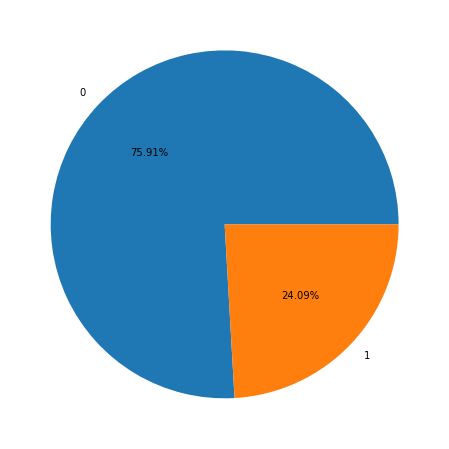

In [12]:
plt.figure(figsize=(10,8))
plt.pie(x=d1, labels=d1.index,autopct="%.2f%%")
plt.show()

In [13]:
x=df.iloc[:,:-1]
y=df['income']
print(x.head())
y.head()

   Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

    occupation   relationship   race   sex   capital_gain   capital_loss  \
0            4              0      4     1              0              0   
1            6              1      4     1              0              0   
2            6              0      2     1              0              0   
3           10              5      2     0              0              0   
4            4              5      4     0              0              0   

    hours_per_week  native_country  
0               13              39  
1               40              39  
2    

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [14]:
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(32536, 14)
(32536,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16268, 14)
(16268, 14)
(16268,)
(16268,)


#  1) DecisionTree 2)Random Forest 3)Logistic Regresion 4)KNN 5)SVC classifier(with linear kernel)

1)Decision Tree

In [17]:
def gen_cls_metrics(ytest,ypred):
    Accuracy_Score=accuracy_score(ytest,ypred)
    cm=confusion_matrix(ytest,ypred)
    #print(cm)
    print(classification_report(ytest,ypred))
    return(Accuracy_Score,cm)
def train_test_score(model):
    Training_score=model.score(x_train,y_train)
    Testing_score=model.score(x_test,y_test)
    return(Training_score,Testing_score)    

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
m1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=16)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=16)

In [20]:
Training_score,Testing_score=train_test_score(m1)
print("Training_score",Training_score)
print("Testing_score",Testing_score)

Training_score 0.8658716498647652
Testing_score 0.8490902385050406


In [21]:
ypred_m1=m1.predict(x_test)

In [22]:
Accuracy_score,cm=gen_cls_metrics(y_test,ypred_m1)
print("Accuracy Score",Accuracy_score)
print("confusion_matrix",cm)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12419
           1       0.71      0.60      0.65      3849

    accuracy                           0.85     16268
   macro avg       0.80      0.76      0.78     16268
weighted avg       0.84      0.85      0.84     16268

Accuracy Score 0.8490902385050406
confusion_matrix [[11490   929]
 [ 1526  2323]]


In [23]:
m1_pref=[["DesicionTree","M1",Accuracy_score ,Training_score,Testing_score]]
res1=pd.DataFrame(m1_pref,columns=["MODEL","MODEL_NAME","ACCURACY_SCORE","TRAINING_SCORE","TESTING_SCORE"],index=[0])
res1.head()

,MODEL,MODEL_NAME,ACCURACY_SCORE,TRAINING_SCORE,TESTING_SCORE
0,DesicionTree,M1,0.84909,0.865872,0.84909


2)Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier
m2=RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=9,min_samples_split=14)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=14,
                       n_estimators=150)

In [25]:
Training_score,Testing_score=train_test_score(m2)
print("Training_score",Training_score)
print("Testing_score",Testing_score)

Training_score 0.859909023850504
Testing_score 0.858372264568478


In [26]:
ypred_m2=m2.predict(x_test)

In [27]:
Accuracy_score,cm=gen_cls_metrics(y_test,ypred_m2)
print("Accuracy Score",Accuracy_score)
print("confusion_matrix",cm)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12419
           1       0.80      0.54      0.64      3849

    accuracy                           0.86     16268
   macro avg       0.83      0.75      0.78     16268
weighted avg       0.85      0.86      0.85     16268

Accuracy Score 0.858372264568478
confusion_matrix [[11883   536]
 [ 1768  2081]]


In [28]:
m2_pref=[["RandomForestTree","M2",Accuracy_score ,Training_score,Testing_score]]
res2=pd.DataFrame(m2_pref,columns=["MODEL","MODEL_NAME","ACCURACY_SCORE","TRAINING_SCORE","TESTING_SCORE"],index=[1])
res2.head()

,MODEL,MODEL_NAME,ACCURACY_SCORE,TRAINING_SCORE,TESTING_SCORE
1,RandomForestTree,M2,0.858372,0.859909,0.858372


3)Logistic Regresion

In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
m3=LogisticRegression(max_iter=10000)
m3.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [31]:
Training_score,Testing_score=train_test_score(m3)
print("Training_score",Training_score)
print("Testing_score",Testing_score)


Training_score 0.7865748709122203
Testing_score 0.7870666338824687


In [32]:
ypred_m3=m3.predict(x_test)

In [33]:
Accuracy_score,cm=gen_cls_metrics(y_test,ypred_m3)
print("Accuracy Score",Accuracy_score)
print("confusion_matrix",cm)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     12419
           1       0.60      0.30      0.40      3849

    accuracy                           0.79     16268
   macro avg       0.71      0.62      0.64     16268
weighted avg       0.76      0.79      0.76     16268

Accuracy Score 0.7870666338824687
confusion_matrix [[11648   771]
 [ 2693  1156]]


In [34]:
m3_pref=[["LogisticRegression","M3",Accuracy_score ,Training_score,Testing_score]]
res3=pd.DataFrame(m3_pref,columns=["MODEL","MODEL_NAME","ACCURACY_SCORE","TRAINING_SCORE","TESTING_SCORE"],index=[2])
res3.head()
print(pd.concat([res1,res2,res3]))

                MODEL MODEL_NAME  ACCURACY_SCORE  TRAINING_SCORE  \
0        DesicionTree         M1        0.849090        0.865872   
1    RandomForestTree         M2        0.858372        0.859909   
2  LogisticRegression         M3        0.787067        0.786575   

   TESTING_SCORE  
0       0.849090  
1       0.858372  
2       0.787067  


4)KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
m4=KNeighborsClassifier(n_neighbors=20)
m4.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [37]:
Training_score,Testing_score=train_test_score(m4)
print("Training_score",Training_score)
print("Testing_score",Testing_score)

Training_score 0.7971477747725596
Testing_score 0.8002827637078928


In [38]:
ypred_m4=m4.predict(x_test)

In [39]:
Accuracy_score,cm=gen_cls_metrics(y_test,ypred_m4)
print("Accuracy Score",Accuracy_score)
print("confusion_matrix",cm)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     12419
           1       0.86      0.19      0.31      3849

    accuracy                           0.80     16268
   macro avg       0.83      0.59      0.59     16268
weighted avg       0.81      0.80      0.75     16268

Accuracy Score 0.8002827637078928
confusion_matrix [[12302   117]
 [ 3132   717]]


In [40]:
m4_pref=[["KNN","M4",Accuracy_score ,Training_score,Testing_score]]
res4=pd.DataFrame(m4_pref,columns=["MODEL","MODEL_NAME","ACCURACY_SCORE","TRAINING_SCORE","TESTING_SCORE"],index=[3])
res4.head()
result2=pd.concat([res1,res2,res3,res4])
result2.head()

,MODEL,MODEL_NAME,ACCURACY_SCORE,TRAINING_SCORE,TESTING_SCORE
0,DesicionTree,M1,0.849090,0.865872,0.849090
1,RandomForestTree,M2,0.858372,0.859909,0.858372
2,LogisticRegression,M3,0.787067,0.786575,0.787067
3,KNN,M4,0.800283,0.797148,0.800283


5)SVC classifier(with linear kernel)

In [41]:
from sklearn.svm import SVC

In [42]:
x_train_svc,x_test_svc,y_train_svc,y_test_svc=train_test_split(x,y,test_size=0.50)
print(x_train_svc.shape)
print(x_test_svc.shape)
print(y_train_svc.shape)
print(y_test_svc.shape)

(16268, 14)
(16268, 14)
(16268,)
(16268,)


In [43]:
m5=SVC(kernel="linear",C=1)
m5.fit(x_train_svc,y_train_svc)

SVC(C=1, kernel='linear')

In [51]:
Training_score,Testing_score=train_test_score(m5)
print("Training_score",Training_score)
print("Testing_score",Testing_score)

Training_score 0.7917383820998278
Testing_score 0.7971477747725596


In [52]:
ypred_m5=m5.predict(x_test)

In [53]:
Accuracy_score,cm=gen_cls_metrics(y_test,ypred_m5)
print("Accuracy Score",Accuracy_score)
print("confusion_matrix",cm)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     12419
           1       0.66      0.29      0.41      3849

    accuracy                           0.80     16268
   macro avg       0.74      0.62      0.64     16268
weighted avg       0.78      0.80      0.77     16268

Accuracy Score 0.7971477747725596
confusion_matrix [[11839   580]
 [ 2720  1129]]


In [54]:
m5_pref=[["SVM","M5",Accuracy_score ,Training_score,Testing_score]]
res5=pd.DataFrame(m5_pref,columns=["MODEL","MODEL_NAME","ACCURACY_SCORE","TRAINING_SCORE","TESTING_SCORE"],index=[4])
res5.head()
res5.head()
result1=pd.concat([res1,res2,res3,res4,res5])
result1.head()

,MODEL,MODEL_NAME,ACCURACY_SCORE,TRAINING_SCORE,TESTING_SCORE
0,DesicionTree,M1,0.849090,0.865872,0.849090
1,RandomForestTree,M2,0.858372,0.859909,0.858372
2,LogisticRegression,M3,0.787067,0.786575,0.787067
3,KNN,M4,0.800283,0.797148,0.800283
4,SVM,M5,0.797148,0.791738,0.797148


In [55]:
dict1=dict(result1["ACCURACY_SCORE"])
print(dict1)

{0: 0.8490902385050406, 1: 0.858372264568478, 2: 0.7870666338824687, 3: 0.8002827637078928, 4: 0.7971477747725596}


In [56]:
lam=lambda x:dict1[x]
model_row=max(dict1,key=lam)
best_model=result1.values[model_row][1]
best_model_name=result1.values[model_row][0]
print(model_row)
print("Best_Model is:",best_model)
print("Bsest_model_name is:",best_model_name)

1
Best_Model is: M2
Bsest_model_name is: RandomForestTree
